# CRISMIS Project

#### Dependencies :

In [181]:
import os
import glob
import time
from PIL import Image
import shutil
import rasterio
import requests
import lacosmic
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from rasterio.plot import show
from bs4 import BeautifulSoup as bs

Some Fixed Variable used : base_dir, base_url

**base_dir** can be set accordinngly by the user

In [182]:
base_dir = "/Users/Yash/Dev/CRISMIS GSoC Project/try"
base_url = "https://pdsimage2.wr.usgs.gov/archive/mess-e_v_h-mdis-2-edr-rawdata-v1.0/MSGRMDS_1001/DATA/"

In [3]:
def initialize():
    '''
    Starts the program by making all the required directories
    '''
    try:
        os.chdir(base_dir)
        #print(os.getcwd())
    except:
        print("Error in changing directory")
        
    data_dir = base_dir + '/retrieved_data/'
    
    if not os.path.exists(data_dir):
        try:
            os.mkdir("./retrieved_data/")
            print("Data Directory initialized")
        except:
            pass
    else:
        print("Directory \"retrieved_data\" already present !")
        
    present = os.path.join(base_dir, 'present')
    absent = os.path.join(base_dir, 'absent')
    
    if not os.path.exists(present):
        try:
            os.mkdir(present)
            print("Present Directory initialized")
        except:
            print("Directory \"Present\" already present !")
    
    if not os.path.exists(absent):
        try:
            os.mkdir(absent)
            print("Absent Directory initialized")
        except:
            print("Directory \"Absent\" already present !")
    
    try:
        os.chdir(data_dir)
        #print(os.getcwd())
    except:
        print("Error in changing directory")

## Step 1 – Retrieving and Plotting Image Files

In [4]:
def downloader(url, path):
    '''
    Downloads the images from the given "url" to the required "path"
    
    Arguments:
    
    url   -- the url to the file to download
    path  -- full path to where to save the file
        
    '''
    try:
        response = requests.get(url)
    except:
        time.sleep(2)
        response = requests.get(url)
    
    if response:
        open(path, 'wb').write(response.content)

In [5]:
def retriever(doy, *varg):  
    '''
    Creates the directory for a given "doy" and sends the link for the image to the "downloader" function
    
    Arguments:
    
    doy    -- the day of the year
    *varg  -- if names of the images are provided, then only those will be downloaded, to the corresponding "doy"
              (optional variable argument)
              if not provided, then all the images of the particular "doy" will be downloaded
    '''
    day_url = base_url + doy
    response = requests.get(day_url)
    data = response.text
    soup =  bs(data, 'html.parser')

    #cwd = os.getcwd()
    #print(cwd)
    work_dir = os.path.join(base_dir, 'retrieved_data', doy)
    #print(work_dir)
    
    if not os.path.exists(work_dir):
        try:
            os.mkdir(work_dir)
            print("Work Directory initialized")
        except:
            print("Directory \"" + doy + "\" already present !")  
            
    try:
        os.chdir(work_dir)
        #cwd = os.getcwd()
        #print(cwd)
    except:
        print("Error in changing directory")
    
    if not varg:
        for href in tqdm(soup.find_all('a'), "Retrieving Data"):
            link = href.get('href')
            if(link[0] not in ('?','/')):
                req_url = day_url + link
                print(link)
                #print(req_url)
                path = work_dir + link
                downloader(req_url, path)
    else:
        for arg in varg:
            req_url = day_url + arg
            print(arg)
            #print(req_url)
            path = work_dir + arg
            downloader(req_url, path)
                
    os.chdir('../')
    #cwd = os.getcwd()
    #print(cwd)

In [6]:
def retrieve_all():
    '''
    Only has to be run once, and it will scrape the "base_url" for all the directories and download all images
    '''
    response = requests.get(base_url)
    data = response.text
    soup =  bs(data, 'html.parser')
    
    for href in tqdm(soup.find_all('a'), "Getting Links"):
        link = href.get('href')
        if(link[0] not in ('?','/')):
            print(link)
            retriever(link)

In [7]:
initialize()

Directory "retrieved_data" already present !


Hard coding the date and image name for the required images. This can be taken as input in the final implementation.

In [8]:
year = 2011
day = 207
img1 = 'EW0220137668G.IMG'
doy = str(year) + "_" + str(day) + "/"
retriever(doy, img1)

EW0220137668G.IMG


Using the recursive **glob** function to search the downloaded data for target image

In [9]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img1) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/EW0220137668G.IMG'

Using **rasterio** to plot satellite imagery

/Users/Yash/opt/anaconda3/envs/ml/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


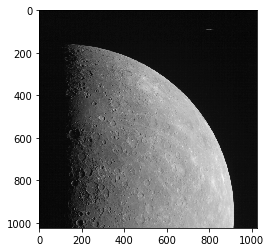

In [10]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

In [11]:
year = 2014
day = 215
img2 = 'EN1049375684M.IMG'
doy = str(year) + "_" + str(day) + "/"
retriever(doy, img2)

EN1049375684M.IMG


In [12]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]
for f in files:
    if f.find(img2) != -1:
        target = f
        break
target

'/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2014_215/EN1049375684M.IMG'

/Users/Yash/opt/anaconda3/envs/ml/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


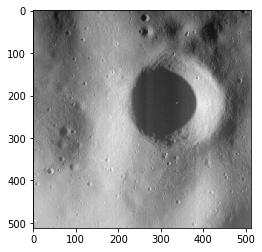

In [13]:
dataset = rasterio.open(target)
show(dataset, cmap='gray')

## Step 2 – Dataset Preparation

Taking some sample dates for dataset preparation

In [14]:
year = 2011
day = 207
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [15]:
year = 2014
day = 215
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [16]:
year = 2011
day = 155
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [17]:
year = 2011
day = 156
doy = str(year) + "_" + str(day) + "/"
retriever(doy)

In [18]:
year = 2011
day = 157
img = "EW0215844301G.IMG"
doy = str(year) + "_" + str(day) + "/"
retriever(doy, img)

EW0215844301G.IMG


Here we take use of the **lacosmic** library to identify whether the image has any cosmic ray artifact present in it or not

In [187]:
def identify_CRA(file, instance=1):
    '''
    Identifies the cosmic ray artifacts for the provided file
    
    Arguments:
    
    file      -- path of the target image
    instance  -- enumerated variable, to maintain count of processed images
                 (default=1)
    '''
    data = rasterio.open(file)
    #show(data, cmap='gray')
    img = data.read()
    img = img * 1.0
    print(instance)
    img_arr = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))
    cleanarr, crmask = lacosmic.lacosmic(img_arr, contrast=5.0, cr_threshold=4.5, neighbor_threshold=0.3, 
                                         error=None, mask=None, background=None, effective_gain=1.0, 
                                         readnoise=6.5, maxiter=4, border_mode=u'mirror')
    return img_arr, cleanarr, crmask

def search(arr, val=True):
    '''
    Search the "crmask" array for "True" values
    
    Arguments:
    
    arr   -- crmask array returned by the lacosmic instance
    val   -- True (fixed argument)
    '''
    for row in arr:
        for element in row:
            if element == val:
                return True
    return False

In [188]:
def make_dataset(files):
    '''
    Preparing the dataset ny moving the downloaded images to the "present" and "absent" directories after 
    identification of Cosmic Ray artifacts
    
    Arguments:
    
    files  -- list of all images in the downloaded data
    '''
    yes = []
    no = []

    present = os.path.join(base_dir, 'present')
    absent = os.path.join(base_dir, 'absent')

    for i, f in enumerate(files):
        img_arr, cleanarr, crmask = identify_CRA(f, i)
        im = Image.fromarray(img_arr)
        boolean = search(crmask)
        if boolean:
            yes.append(f)
            destination = os.path.join(present, f[f.rfind('/')+1:f.rfind('.')])
            try:
                plt.imsave(destination+".png", img_arr, cmap='gray')
                #shutil.copy(f, destination)
            except Exception as e:
                print(e)
        else:
            no.append(f)
            destination = os.path.join(absent, f[f.rfind('/')+1:f.rfind('.')])
            try:
                plt.imsave(destination+".png", img_arr, cmap='gray')
                #shutil.copy(f, destination)
            except Exception as e:
                print(e)
                
    return yes, no

Testing for downloaded images

In [171]:
files = [f for f in glob.glob(base_dir + "/retrieved_data/**/*.IMG", recursive=True)]

print(len(files))

yes, no = make_dataset(files)

print(len(yes))
print(len(no))

558
0
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
1
INFO: Iteration 1: Found 124 cosmic-ray pixels, Total: 124 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 124 [lacosmic.lacosmic]
Format 'img' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)
2
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
3
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
4
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
5
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
6
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
7
INFO: Iteration 1: Found 3 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 3 [lacosmic.lacosmic]
Format 'img' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz,

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Plotting 10 images of both **present** and **absent** directories for verification purposes

Images having Cosmic Ray Artifacts


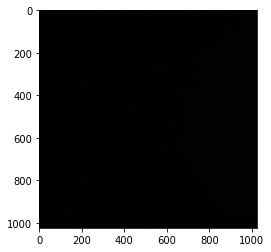

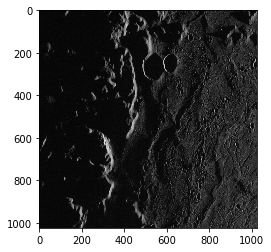

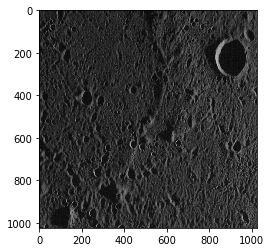

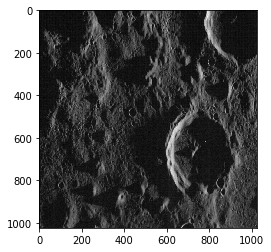

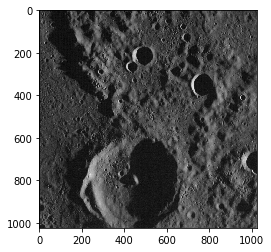

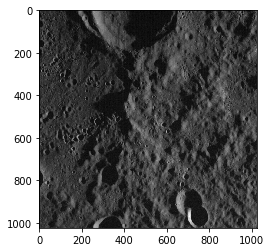

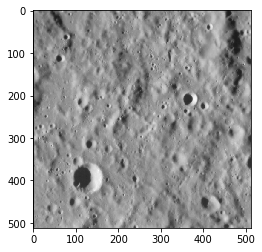

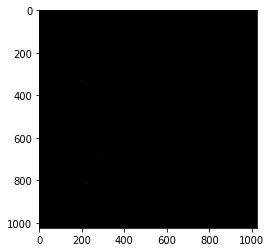

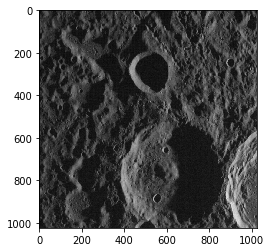

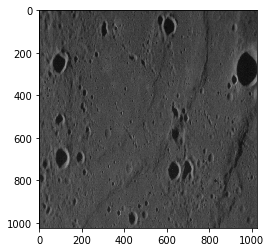

In [22]:
print("Images having Cosmic Ray Artifacts")
for f in yes[:10]:
    data = rasterio.open(f)
    show(data, cmap='gray')

Images NOT having Cosmic Ray Artifacts


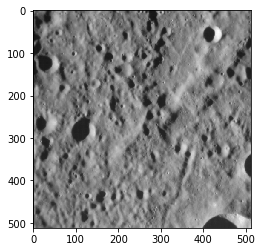

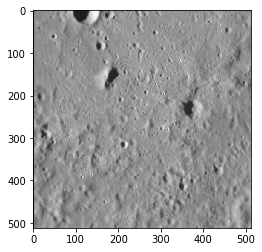

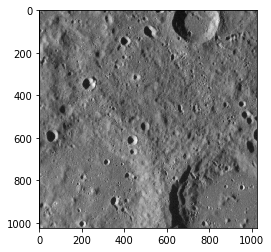

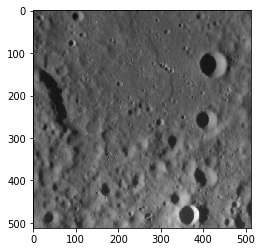

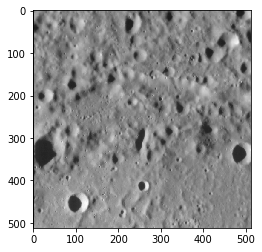

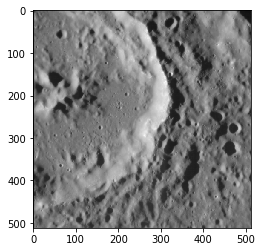

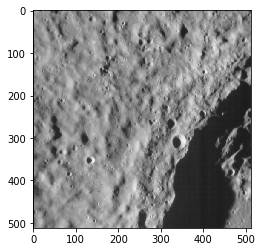

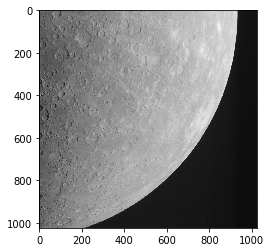

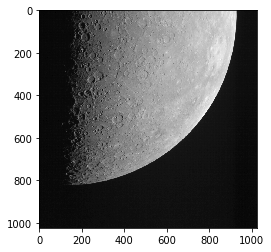

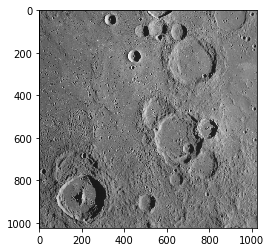

In [23]:
print("Images NOT having Cosmic Ray Artifacts")
for f in no[:10]:
    data = rasterio.open(f)
    show(data, cmap='gray')

Testing for given images

In [189]:
files = [base_dir + "/retrieved_data/2011_207/EW0220137668G.IMG", 
        base_dir + "/retrieved_data/2011_155/EW0215651174C.IMG",
        base_dir + "/retrieved_data/2014_215/EN1049375684M.IMG",
        base_dir + "/retrieved_data/2011_156/EN0215728629M.IMG",
        base_dir + "/retrieved_data/2011_156/EW0215726557D.IMG",
        base_dir + "/retrieved_data/2011_157/EW0215844301G.IMG"]

print(len(files))

yes, no = make_dataset(files)
    
print(len(yes))
print(len(no))

6
0
INFO: Iteration 1: Found 14 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
1
INFO: Iteration 1: Found 10 cosmic-ray pixels, Total: 10 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 10 [lacosmic.lacosmic]
2
INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.lacosmic]
3
INFO: Iteration 1: Found 601 cosmic-ray pixels, Total: 601 [lacosmic.lacosmic]
INFO: Iteration 2: Found 11 cosmic-ray pixels, Total: 612 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 612 [lacosmic.lacosmic]
4
INFO: Iteration 1: Found 653 cosmic-ray pixels, Total: 653 [lacosmic.lacosmic]
INFO: Iteration 2: Found 2 cosmic-ray pixels, Total: 655 [lacosmic.lacosmic]
INFO: Iteration 3: Found 0 cosmic-ray pixels, Total: 655 [lacosmic.lacosmic]
5
INFO: Iteration 1: Found 19 cosmic-ray pixels, Total: 19 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 19 [laco

Images having Cosmic Ray Artifacts
Image : EW0220137668G.IMG


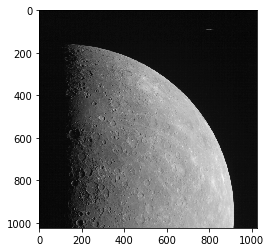

Image : EW0215651174C.IMG


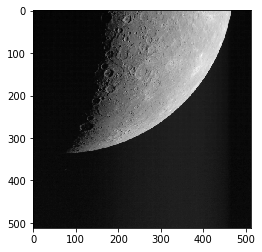

Image : EN0215728629M.IMG


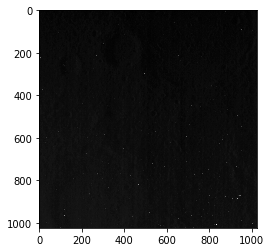

Image : EW0215726557D.IMG


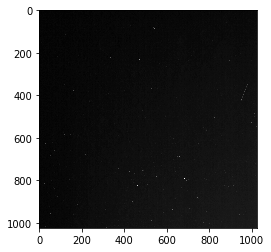

Image : EW0215844301G.IMG


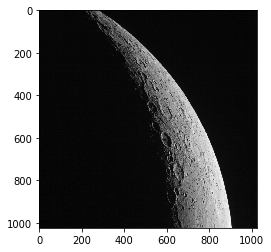

In [63]:
print("Images having Cosmic Ray Artifacts")
for f in yes:
    print("Image : " + f[f.rfind('/')+1:])
    data = rasterio.open(f)
    show(data, cmap='gray')

Images NOT having Cosmic Ray Artifacts
Image : EN1049375684M.IMG


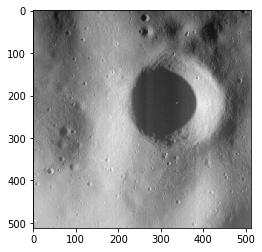

In [64]:
print("Images NOT having Cosmic Ray Artifacts")
for f in no:
    print("Image : " + f[f.rfind('/')+1:])
    data = rasterio.open(f)
    show(data, cmap='gray')

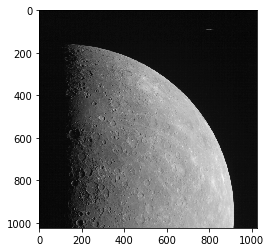

In [169]:
plt.imshow(ia, 'gray')

In [74]:
ca.dtype

dtype('float64')

EW0220137668G


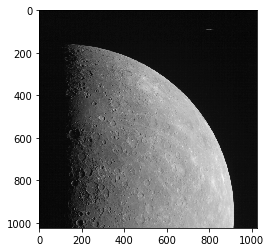

1
INFO: Iteration 1: Found 14 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]
INFO: Iteration 2: Found 0 cosmic-ray pixels, Total: 14 [lacosmic.lacosmic]


In [174]:
x = yes[0]
print(x[x.rfind('/')+1:x.rfind('.')])
data = rasterio.open(x)
show(data, cmap='gray')
ia, ca, crm = identify_CRA(x)

In [90]:
if 1 in crm:
    print("1")
else:
    print("0")

1


In [ ]:
for i in ia-ca:
    for j in i:
        print(j)

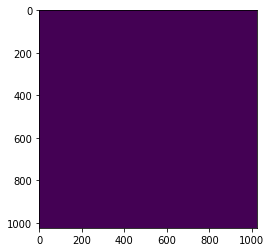

In [89]:
plt.imshow(c)

In [28]:
print(data.count)
print(data.width)
print(data.height)
print(data.shape)
print({i: dtype for i, dtype in zip(data.indexes, data.dtypes)})
print(data.bounds)
print(data.transform)
arr = data.read()
print(arr)
print(data.tags())

1
1024
1024
(1024, 1024)
{1: 'uint8'}
BoundingBox(left=0.0, bottom=1024.0, right=1024.0, top=0.0)
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
[[[26 25 22 ... 25 25 24]
  [24 24 21 ... 24 25 24]
  [24 24 22 ... 25 26 27]
  ...
  [21 22 21 ... 30 31 30]
  [21 22 22 ... 30 30 31]
  [20 21 21 ... 29 30 30]]]
{'BANDWIDTH': '5.1 <NM>', 'CENTER_FILTER_WAVELENGTH': '748.7 <NM>', 'DATA_SET_ID': '"MESS-E/V/H-MDIS-2-EDR-RAWDATA-V1.0"', 'FILTER_NAME': '"750 BW 5"', 'INSTRUMENT_ID': '"MDIS-WAC"', 'INSTRUMENT_NAME': '"MERCURY DUAL IMAGING SYSTEM WIDE ANGLE CAMERA"', 'MISSION_NAME': '"MESSENGER"', 'NOTE': '', 'PRODUCER_INSTITUTION_NAME': '"APPLIED COHERENT TECHNOLOGY CORPORATION"', 'PRODUCT_CREATION_TIME': '2011-11-22T18:29:59', 'PRODUCT_ID': '"EW0220137668G"', 'PRODUCT_TYPE': '', 'SPACECRAFT_NAME': '', 'TARGET_NAME': '"MERCURY"'}


In [164]:
plt.imshow(img_arr)

NameError: name 'img_arr' is not defined

In [57]:
data

<open RasterReader name='/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/EW0220137668G.IMG' mode='r'>

In [58]:
arr.shape

(1, 1024, 1024)

In [29]:
data

<open RasterReader name='/Users/Yash/Dev/CRISMIS GSoC Project/try/retrieved_data/2011_207/EW0220137668G.IMG' mode='r'>

In [35]:
src = open(x, 'rb')
src.readlines()

[b'PDS_VERSION_ID       = PDS3\r\n',
 b'\r\n',
 b'/*** FILE FORMAT ***/\r\n',
 b'RECORD_TYPE          = FIXED_LENGTH\r\n',
 b'RECORD_BYTES         = 1024\r\n',
 b'FILE_RECORDS          = 1031\r\n',
 b'LABEL_RECORDS         = 0007\r\n',
 b'\r\n',
 b'/*** POINTERS TO START BYTE OFFSET OF OBJECTS IN IMAGE FILE ***/\r\n',
 b'^IMAGE                = 0008\r\n',
 b'\r\n',
 b'/*** GENERAL DATA DESCRIPTION PARAMETERS ***/\r\n',
 b'MISSION_NAME         = "MESSENGER"\r\n',
 b'INSTRUMENT_HOST_NAME = "MESSENGER"\r\n',
 b'DATA_SET_ID          = "MESS-E/V/H-MDIS-2-EDR-RAWDATA-V1.0"\r\n',
 b'DATA_QUALITY_ID      = "0000000000000000"\r\n',
 b'PRODUCT_ID           = "EW0220137668G"\r\n',
 b'PRODUCT_VERSION_ID   = "3"\r\n',
 b'SOURCE_PRODUCT_ID    = ("0220137668_IM5WV")\r\n',
 b'PRODUCER_INSTITUTION_NAME = "APPLIED COHERENT TECHNOLOGY CORPORATION"\r\n',
 b'SOFTWARE_NAME        = "MDIS2EDR"\r\n',
 b'SOFTWARE_VERSION_ID  = "1.0"\r\n',
 b'MISSION_PHASE_NAME   = "MERCURY ORBIT"\r\n',
 b'TARGET_NAME          

In [37]:
y = no[0]
yf = open(y, 'rb')
yf.readlines()

[b'PDS_VERSION_ID       = PDS3\r\n',
 b'\r\n',
 b'/*** FILE FORMAT ***/\r\n',
 b'RECORD_TYPE          = FIXED_LENGTH\r\n',
 b'RECORD_BYTES         = 512\r\n',
 b'FILE_RECORDS          = 0526\r\n',
 b'LABEL_RECORDS         = 0014\r\n',
 b'\r\n',
 b'/*** POINTERS TO START BYTE OFFSET OF OBJECTS IN IMAGE FILE ***/\r\n',
 b'^IMAGE                = 0015\r\n',
 b'\r\n',
 b'/*** GENERAL DATA DESCRIPTION PARAMETERS ***/\r\n',
 b'MISSION_NAME         = "MESSENGER"\r\n',
 b'INSTRUMENT_HOST_NAME = "MESSENGER"\r\n',
 b'DATA_SET_ID          = "MESS-E/V/H-MDIS-2-EDR-RAWDATA-V1.0"\r\n',
 b'DATA_QUALITY_ID      = "0000001000000000"\r\n',
 b'PRODUCT_ID           = "EN1049375684M"\r\n',
 b'PRODUCT_VERSION_ID   = "3"\r\n',
 b'SOURCE_PRODUCT_ID    = ("1049375684_IM5")\r\n',
 b'PRODUCER_INSTITUTION_NAME = "APPLIED COHERENT TECHNOLOGY CORPORATION"\r\n',
 b'SOFTWARE_NAME        = "MDIS2EDR"\r\n',
 b'SOFTWARE_VERSION_ID  = "1.1"\r\n',
 b'MISSION_PHASE_NAME   = "MERCURY ORBIT YEAR 4"\r\n',
 b'TARGET_NAME      

In [141]:
def showCR(image,mask,sz):
   
    crops = []
    r,c = np.where(mask==1)
    crindex = np.where(mask==1) #Find the indexes of each CR artifact inside the image
    print(crindex[0])
    cr_row = crindex[0][0]
    print(cr_row)
    cr_column = crindex[1][0]
    print(cr_column)
    for i in range(len(crindex[0])):
        if i > 0:
            #If the next artifact is too close to the previous one, skip this iteration
            #As said artifact was shown in the last plot
            if (abs(crindex[0][i] - cr_row) < 100) and (abs(crindex[1][i] - cr_column) < 100): 
                continue
    
        yaxis = crindex[0][i]
        xaxis = crindex[1][i]
        top_margin = max(0,yaxis-sz)
        bottom_margin = min(image.shape[0]-1,yaxis+sz)
        left_margin = max(0,xaxis-sz)
        right_margin = min(image.shape[1]-1,xaxis+sz)

        crops.append(image[top_margin:bottom_margin,left_margin:right_margin])

        cr_row = crindex[0][i]
        cr_column = crindex[1][i]
      
    fig=plt.figure()  
    for j in range(1, len(crops)+1):
        fig.add_subplot(1, len(crops), j)
        plt.imshow(crops[j-1], cmap = "gray")
        plt.axis('off')
        
    plt.show()

    return r,c

In [140]:
box = (91,776, 92, 784)
region = ia.crop(box)

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

[ 91  91  92  92  92  92  92  92  92  92 429 430 430 431]
91
776


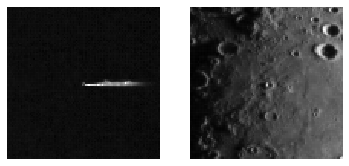

(array([ 91,  91,  92,  92,  92,  92,  92,  92,  92,  92, 429, 430, 430,
        431]),
 array([776, 783, 777, 778, 779, 780, 781, 782, 783, 784, 184, 183, 184,
        184]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

In [160]:
r, c = showCR(ia,crm,50)
r,c,crm

### plt.imshow(ia*crm)